In [ ]:
# model - microsoft/swin-base-patch4-window7-224
# accuracy - 95
# dataset - KinFaceW2

In [ ]:
#1
from google.colab import files
uploaded = files.upload()


Saving KinFaceW-I.zip to KinFaceW-I.zip
Saving KinFaceW-II.zip to KinFaceW-II.zip


In [ ]:
!unzip KinFaceW-II.zip -d /content/KinFaceW-II
!unzip KinFaceW-I.zip -d /content/KinFaceW-I
#2


Archive:  KinFaceW-II.zip
   creating: /content/KinFaceW-II/KinFaceW-II/images/
   creating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_001_1.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_001_2.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_002_1.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_002_2.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_003_1.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_003_2.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_004_1.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_004_2.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_005_1.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/fd_005_2.jpg  
  inflating: /content/KinFaceW-II/KinFaceW-II/images/father-dau/f

In [ ]:
import os

def dataset_paths(startpath):
    image_samples = {}  # Dictionary to store one image per folder

    # Step 1: Print only folder names
    print("📂 Directory Structure:\n")
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent = " " * 4 * level
        print(f"{indent}{os.path.basename(root)}/")  # Print only folder names

        # Step 2: Store one image file per folder (if images exist)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if image_files:
            image_samples[os.path.basename(root)] = image_files[0]  # Pick first image

    # Step 3: Print one image file per folder at the end
    print("\n📸 Sample Image from Each Folder:\n")
    for folder, image in image_samples.items():
        print(f"{folder}/ -> {image}")

# Set the dataset path after uploading/extracting it
dataset_path = "/content/KinFaceW-II"  # Change path if needed
dataset_paths(dataset_path)

#3

📂 Directory Structure:

KinFaceW-II/
    KinFaceW-II/
        meta_data/
        images/
            father-son/
            mother-dau/
            mother-son/
            father-dau/

📸 Sample Image from Each Folder:

father-son/ -> fs_046_2.jpg
mother-dau/ -> md_110_2.jpg
mother-son/ -> ms_054_2.jpg
father-dau/ -> fd_199_1.jpg


In [ ]:
import os

def create_kinship_pairs(base_path):
    pairs = {"fd": [], "fs": [], "md": [], "ms": []}

    # Define the subfolder for each kinship type
    kinship_folders = {
        "fd": "father-dau",
        "fs": "father-son",
        "md": "mother-dau",
        "ms": "mother-son"
    }

    images_path = os.path.join(base_path, "images")

    # Process each kinship category
    for kinship_code, folder_name in kinship_folders.items():
        folder_path = os.path.join(images_path, folder_name)

        if not os.path.exists(folder_path):
            print(f"⚠️ Warning: {folder_path} not found.")
            continue

        image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])

        image_dict = {}
        for img_file in image_files:
            try:
                # Extract id and image index: e.g., fd_211_2.jpg → ['fd', '211', '2']
                parts = img_file.split('_')
                if len(parts) == 3:
                    kin_code, img_id, img_num = parts
                    key = f"{kin_code}_{img_id}"

                    if key not in image_dict:
                        image_dict[key] = []

                    image_dict[key].append(os.path.join(folder_path, img_file))
            except Exception as e:
                print(f"⚠️ Error processing {img_file}: {e}")

        # Form pairs (only if there are exactly 2 images per ID)
        for img_id, img_paths in image_dict.items():
            if len(img_paths) == 2:
                pairs[kinship_code].append(tuple(img_paths))
                print(f"✅ Matched {kinship_code.upper()}: {os.path.basename(img_paths[0])} ↔ {os.path.basename(img_paths[1])}")
            else:
                print(f"❌ Skipped {img_id} (expected 2 images, found {len(img_paths)})")

    return pairs

# Path to KinFaceW-II root
dataset_path = "/content/KinFaceW-II/KinFaceW-II"

# Create pairs and print summary
kinship_pairs = create_kinship_pairs(dataset_path)

print("\n📌 Summary:")
for kin, pair_list in kinship_pairs.items():
    print(f"{kin.upper()}: {len(pair_list)} pairs created.")

#4


✅ Matched FD: fd_001_1.jpg ↔ fd_001_2.jpg
✅ Matched FD: fd_002_1.jpg ↔ fd_002_2.jpg
✅ Matched FD: fd_003_1.jpg ↔ fd_003_2.jpg
✅ Matched FD: fd_004_1.jpg ↔ fd_004_2.jpg
✅ Matched FD: fd_005_1.jpg ↔ fd_005_2.jpg
✅ Matched FD: fd_006_1.jpg ↔ fd_006_2.jpg
✅ Matched FD: fd_007_1.jpg ↔ fd_007_2.jpg
✅ Matched FD: fd_008_1.jpg ↔ fd_008_2.jpg
✅ Matched FD: fd_009_1.jpg ↔ fd_009_2.jpg
✅ Matched FD: fd_010_1.jpg ↔ fd_010_2.jpg
✅ Matched FD: fd_011_1.jpg ↔ fd_011_2.jpg
✅ Matched FD: fd_012_1.jpg ↔ fd_012_2.jpg
✅ Matched FD: fd_013_1.jpg ↔ fd_013_2.jpg
✅ Matched FD: fd_014_1.jpg ↔ fd_014_2.jpg
✅ Matched FD: fd_015_1.jpg ↔ fd_015_2.jpg
✅ Matched FD: fd_016_1.jpg ↔ fd_016_2.jpg
✅ Matched FD: fd_017_1.jpg ↔ fd_017_2.jpg
✅ Matched FD: fd_018_1.jpg ↔ fd_018_2.jpg
✅ Matched FD: fd_019_1.jpg ↔ fd_019_2.jpg
✅ Matched FD: fd_020_1.jpg ↔ fd_020_2.jpg
✅ Matched FD: fd_021_1.jpg ↔ fd_021_2.jpg
✅ Matched FD: fd_022_1.jpg ↔ fd_022_2.jpg
✅ Matched FD: fd_023_1.jpg ↔ fd_023_2.jpg
✅ Matched FD: fd_024_1.jpg ↔ fd_02

In [ ]:
import torch
from torch.utils.data import Dataset
import cv2
import numpy as np
from PIL import Image
from torchvision import transforms

class KinshipDataset(Dataset):
    def __init__(self, pairs, transform=None, create_negatives=True, negative_ratio=1.0):
        self.pairs = []
        self.labels = []
        self.transform = transform

        # Add positive pairs (real kinship pairs)
        for kinship_type, pair_list in pairs.items():
            for parent_path, child_path in pair_list:
                self.pairs.append((parent_path, child_path))
                self.labels.append(1)  # 1 means positive pair (real kinship)

        # Create negative pairs (non-kinship pairs)
        if create_negatives:
            n_positive = len(self.pairs)
            n_negative = int(n_positive * negative_ratio)

            # Flatten all images
            all_images = []
            for kinship_type, pair_list in pairs.items():
                for parent_path, child_path in pair_list:
                    all_images.append(parent_path)
                    all_images.append(child_path)

            # Create negative pairs by randomly sampling
            negative_count = 0
            max_tries = n_negative * 10  # Avoid infinite loop
            tries = 0

            while negative_count < n_negative and tries < max_tries:
                tries += 1
                # Randomly select two images
                idx1 = np.random.randint(0, len(all_images))
                idx2 = np.random.randint(0, len(all_images))

                # Check if this is a genuine pair (avoid creating false negatives)
                img1_path = all_images[idx1]
                img2_path = all_images[idx2]


                if img1_path == img2_path:
                    continue

                # Check if this is one of our positive pairs
                is_positive = False
                for p1, p2 in self.pairs:
                    if (img1_path == p1 and img2_path == p2) or (img1_path == p2 and img2_path == p1):
                        is_positive = True
                        break

                if not is_positive:
                    self.pairs.append((img1_path, img2_path))
                    self.labels.append(0)  # 0 means negative pair (no kinship)
                    negative_count += 1

        # Convert labels to tensor
        self.labels = torch.tensor(self.labels) #tensor is list of labels for going thru model

        print(f"✅ Created dataset with {len(self.pairs)} pairs: {sum(self.labels)} positive, {len(self.labels) - sum(self.labels)} negative")

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path = self.pairs[idx]
        label = self.labels[idx]

        # Read images
        try:
            img1 = Image.open(img1_path).convert('RGB')
            img2 = Image.open(img2_path).convert('RGB')
        except Exception as e:
            print(f"⚠️ Error reading images at index {idx}: {e}")
            # Return a placeholder if there's an error
            img1 = Image.new('RGB', (224, 224))
            img2 = Image.new('RGB', (224, 224))

        # Apply transformations
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, label

# Create transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), #convert img to pytorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset
dataset = KinshipDataset(kinship_pairs, transform=transform)

# Check dataset balance
positive_count = sum(dataset.labels).item()
negative_count = len(dataset) - positive_count
print(f"✅ Dataset created with {len(dataset)} total pairs:")
print(f"   - Positive pairs: {positive_count} ({positive_count/len(dataset)*100:.1f}%)")
print(f"   - Negative pairs: {negative_count} ({negative_count/len(dataset)*100:.1f}%)")
#5

✅ Created dataset with 2000 pairs: 1000 positive, 1000 negative
✅ Dataset created with 2000 total pairs:
   - Positive pairs: 1000 (50.0%)
   - Negative pairs: 1000 (50.0%)


In [ ]:
import torch
import torch.nn as nn
from transformers import SwinModel, SwinConfig
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

# Label smoothing loss
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing

    def forward(self, pred, target):
        log_probs = torch.nn.functional.log_softmax(pred, dim=-1)
        nll_loss = -log_probs.gather(dim=-1, index=target.unsqueeze(1)).squeeze(1)
        smooth_loss = -log_probs.mean(dim=-1)
        return self.confidence * nll_loss + self.smoothing * smooth_loss

# Optimized Siamese Swin Transformer
class SiameseSwinTransformer(nn.Module):
    def __init__(self, pretrained=True, freeze_base=False):
        super(SiameseSwinTransformer, self).__init__()

        # Load Swin Transformer backbone
        if pretrained:
            self.swin = SwinModel.from_pretrained("microsoft/swin-base-patch4-window7-224")
        else:
            config = SwinConfig.from_pretrained("microsoft/swin-base-patch4-window7-224")
            self.swin = SwinModel(config)

        self.feature_dim = self.swin.config.hidden_size

        # Freeze Swin backbone if specified
        if freeze_base:
            for param in self.swin.parameters():
                param.requires_grad = False

        # Feature fusion + classification head
        self.fc = nn.Sequential(
            nn.BatchNorm1d(self.feature_dim * 4),
            nn.Linear(self.feature_dim * 4, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 2)
        )

    def forward_one(self, x):
        outputs = self.swin(x)
        # Use pooler_output or fallback to mean-pooled last_hidden_state
        if outputs.pooler_output is not None:
            return outputs.pooler_output
        else:
            return outputs.last_hidden_state.mean(dim=1)

    def forward(self, x1, x2):
        feat1 = self.forward_one(x1)
        feat2 = self.forward_one(x2)

        # Enhanced fusion: [x1, x2, |x1-x2|, x1*x2]
        diff = torch.abs(feat1 - feat2)
        prod = feat1 * feat2
        combined = torch.cat((feat1, feat2, diff, prod), dim=1)

        out = self.fc(combined)
        return out


# ✅ Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")
print("✅ Model created successfully")


✅ Using device: cuda
✅ Model created successfully


In [ ]:
import time
import copy
import torch
from torch.utils.data import DataLoader

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=30, patience=30):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_f1 = 0.0
    no_improve_epochs = 0

    history = {
        'train_loss': [], 'train_acc': [], 'train_prec': [], 'train_rec': [], 'train_f1': [],
        'val_loss': [], 'val_acc': [], 'val_prec': [], 'val_rec': [], 'val_f1': []
    }

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Train
        train_loss, train_acc, train_prec, train_rec, train_f1 = train_epoch(model, train_loader, criterion, optimizer, device)

        # Validate
        val_loss, val_acc, val_prec, val_rec, val_f1 = validate(model, val_loader, criterion, device)

        # Update scheduler
        scheduler.step(val_loss)

        # Save history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['train_prec'].append(train_prec)
        history['train_rec'].append(train_rec)
        history['train_f1'].append(train_f1)

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_prec'].append(val_prec)
        history['val_rec'].append(val_rec)
        history['val_f1'].append(val_f1)

        # Print epoch results
        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} F1: {train_f1:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} F1: {val_f1:.4f}')

        # Save best model
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_model_wts = copy.deepcopy(model.state_dict())
            no_improve_epochs = 0
            print(f'✅ New best model saved with F1: {best_f1:.4f}')
        else:
            no_improve_epochs += 1
            print(f'⚠️ No improvement for {no_improve_epochs} epochs (best F1: {best_f1:.4f})')

        # Early stopping
        if no_improve_epochs >= patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

        print()



In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into train, validation, and test sets
def create_data_splits(dataset, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1"

    dataset_size = len(dataset)
    train_size = int(dataset_size * train_ratio)
    val_size = int(dataset_size * val_ratio)
    test_size = dataset_size - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )

    print(f"✅ Dataset split:")
    print(f"   - Train set: {len(train_dataset)} samples")
    print(f"   - Validation set: {len(val_dataset)} samples")
    print(f"   - Test set: {len(test_dataset)} samples")

    return train_dataset, val_dataset, test_dataset

# Create data loaders
def create_data_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    print(f"✅ Data loaders created with batch size {batch_size}")

    return train_loader, val_loader, test_loader

# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for img1, img2, labels in train_loader:
        img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

        # Forward pass
        outputs = model(img1, img2)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track statistics
        running_loss += loss.item() * img1.size(0)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='binary', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='binary', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='binary', zero_division=0)

    return epoch_loss, accuracy, precision, recall, f1

# Validation function
def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for img1, img2, labels in val_loader:
            img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

            # Forward pass
            outputs = model(img1, img2)
            loss = criterion(outputs, labels)

            # Track statistics
            running_loss += loss.item() * img1.size(0)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate epoch metrics
    epoch_loss = running_loss / len(val_loader.dataset)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='binary', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='binary', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='binary', zero_division=0)

    return epoch_loss, accuracy, precision, recall, f1

# Create data splits
train_dataset, val_dataset, test_dataset = create_data_splits(dataset)

# Create data loaders
batch_size = 32
train_loader, val_loader, test_loader = create_data_loaders(train_dataset, val_dataset, test_dataset, batch_size)

# Define loss function and optimizer
model = SiameseSwinTransformer(pretrained=True, freeze_base=False)
criterion = nn.CrossEntropyLoss()
# Replace the optimizer definition
optimizer = optim.AdamW(model.parameters(), lr=5e-6, weight_decay=2e-4)
# Replace the scheduler definition
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer,
    T_0=5,
    T_mult=2,
    eta_min=1e-7,
    verbose=True
)

print("✅ Training setup complete")

✅ Dataset split:
   - Train set: 1400 samples
   - Validation set: 300 samples
   - Test set: 300 samples
✅ Data loaders created with batch size 32


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

✅ Training setup complete


In [ ]:
import os
import re
from collections import defaultdict
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

def check_id_overlap(pairs):
    """Extract subject IDs from image filenames and check if they appear in multiple kinship categories"""

    print("🔍 Analyzing dataset structure and potential ID overlaps...")

    # Extract IDs from filenames
    id_pattern = re.compile(r'(\w+)_(\d+)_\d+\.jpg')

    # Track IDs by kinship type
    ids_by_kinship = defaultdict(set)
    all_ids = set()

    # Files by ID
    id_to_files = defaultdict(list)

    # Analyze each kinship category
    for kinship_type, pair_list in pairs.items():
        print(f"\n📊 Analyzing {kinship_type.upper()} category ({len(pair_list)} pairs):")

        for img_path1, img_path2 in pair_list:
            # Extract filenames
            file1 = os.path.basename(img_path1)
            file2 = os.path.basename(img_path2)

            # Extract IDs
            match1 = id_pattern.search(file1)
            match2 = id_pattern.search(file2)

            if match1 and match2:
                id1 = match1.group(2)  # The numeric ID
                id2 = match2.group(2)

                # In this dataset, paired images should have the same ID
                if id1 != id2:
                    print(f"⚠️ Warning: ID mismatch in pair: {file1} and {file2}")

                # Add ID to this kinship type
                ids_by_kinship[kinship_type].add(id1)
                all_ids.add(id1)

                # Store files for this ID
                id_to_files[id1].append(file1)
                id_to_files[id1].append(file2)

    # Print ID statistics
    print(f"\n🧩 Total unique IDs in dataset: {len(all_ids)}")
    for kinship_type, id_set in ids_by_kinship.items():
        print(f"   - {kinship_type.upper()}: {len(id_set)} unique IDs")

    # Check for overlapping IDs between kinship types
    print("\n🔍 Checking for ID overlaps between kinship categories:")
    overlap_detected = False

    for k1 in ids_by_kinship:
        for k2 in ids_by_kinship:
            if k1 >= k2:  # Skip duplicate checks (including self)
                continue

            overlap = ids_by_kinship[k1].intersection(ids_by_kinship[k2])
            if overlap:
                overlap_detected = True
                print(f"⚠️ Found {len(overlap)} IDs shared between {k1.upper()} and {k2.upper()}:")
                for id_val in overlap:
                    print(f"   - ID {id_val}: Files {id_to_files[id_val]}")

    if not overlap_detected:
        print("✅ No ID overlaps found between kinship categories")

    return ids_by_kinship, id_to_files, all_ids

def simulate_train_test_split_leakage(all_ids, train_ratio=0.7):
    """Simulate random split to check for potential leakage issues"""
    # Convert to list for random splitting
    id_list = list(all_ids)

    # Randomize IDs
    random.seed(42)  # For reproducibility
    random.shuffle(id_list)

    # Split into train/test
    split_idx = int(len(id_list) * train_ratio)
    train_ids = set(id_list[:split_idx])
    test_ids = set(id_list[split_idx:])

    print(f"\n🔀 Simulated dataset split (by ID):")
    print(f"   - Training: {len(train_ids)} IDs ({len(train_ids)/len(all_ids)*100:.1f}%)")
    print(f"   - Testing: {len(test_ids)} IDs ({len(test_ids)/len(all_ids)*100:.1f}%)")

    # Verify no overlap
    overlap = train_ids.intersection(test_ids)
    if overlap:
        print(f"❌ ERROR: Found {len(overlap)} IDs in both train and test!")
    else:
        print(f"✅ No ID overlap between train and test splits")

    return train_ids, test_ids

def analyze_current_split(dataset, train_dataset, val_dataset, test_dataset):
    """Analyze the current random_split for data leakage"""

    print("\n🔍 Analyzing current dataset split for potential leakage...")

    # Extract IDs from each split
    train_ids = extract_ids_from_split(dataset, train_dataset.indices)
    val_ids = extract_ids_from_split(dataset, val_dataset.indices)
    test_ids = extract_ids_from_split(dataset, test_dataset.indices)

    # Check for overlaps
    train_val_overlap = train_ids.intersection(val_ids)
    train_test_overlap = train_ids.intersection(test_ids)
    val_test_overlap = val_ids.intersection(test_ids)

    print(f"\n🧮 ID counts by split:")
    print(f"   - Train: {len(train_ids)} unique IDs")
    print(f"   - Validation: {len(val_ids)} unique IDs")
    print(f"   - Test: {len(test_ids)} unique IDs")

    # Report overlaps
    print("\n🔄 Checking for ID overlaps between splits:")

    if train_val_overlap:
        print(f"⚠️ LEAKAGE DETECTED: {len(train_val_overlap)} IDs appear in both train and validation!")
        print(f"   Example overlapping IDs: {list(train_val_overlap)[:5]}")
    else:
        print("✅ No overlap between train and validation sets")

    if train_test_overlap:
        print(f"⚠️ LEAKAGE DETECTED: {len(train_test_overlap)} IDs appear in both train and test!")
        print(f"   Example overlapping IDs: {list(train_test_overlap)[:5]}")
    else:
        print("✅ No overlap between train and test sets")

    if val_test_overlap:
        print(f"⚠️ LEAKAGE DETECTED: {len(val_test_overlap)} IDs appear in both validation and test!")
        print(f"   Example overlapping IDs: {list(val_test_overlap)[:5]}")
    else:
        print("✅ No overlap between validation and test sets")

    # Calculate total overlap percentage
    total_overlap = len(train_val_overlap) + len(train_test_overlap) + len(val_test_overlap)
    if total_overlap > 0:
        print(f"\n⚠️ Total data leakage: {total_overlap} ID overlaps detected across splits!")
        return False
    else:
        print(f"\n✅ No data leakage detected in current splits")
        return True

def extract_ids_from_split(dataset, indices):
    """Extract unique IDs from a dataset split"""
    ids = set()
    id_pattern = re.compile(r'(\w+)_(\d+)_\d+\.jpg')

    for idx in indices:
        img1_path, img2_path = dataset.pairs[idx]

        # Extract IDs from both images
        file1 = os.path.basename(img1_path)
        file2 = os.path.basename(img2_path)

        match1 = id_pattern.search(file1)
        match2 = id_pattern.search(file2)

        if match1:
            ids.add(match1.group(2))
        if match2:
            ids.add(match2.group(2))

    return ids

def create_leakage_free_splits(dataset, train_ratio=0.7, val_ratio=0.15):
    """Create dataset splits that avoid ID leakage"""
    print("\n🔧 Creating leakage-free dataset splits...")

    # Extract all unique IDs and their corresponding sample indices
    id_to_indices = defaultdict(list)
    id_pattern = re.compile(r'(\w+)_(\d+)_\d+\.jpg')

    for idx, (img1_path, img2_path) in enumerate(dataset.pairs):
        # Extract IDs from filenames
        file1 = os.path.basename(img1_path)
        file2 = os.path.basename(img2_path)

        match1 = id_pattern.search(file1)
        match2 = id_pattern.search(file2)

        if match1:
            id_val = match1.group(2)
            id_to_indices[id_val].append(idx)

    # Get list of all unique IDs
    all_ids = list(id_to_indices.keys())

    # Randomly shuffle IDs
    random.seed(42)
    random.shuffle(all_ids)

    # Split IDs into train, val, test
    train_split = int(len(all_ids) * train_ratio)
    val_split = int(len(all_ids) * (train_ratio + val_ratio))

    train_ids = all_ids[:train_split]
    val_ids = all_ids[train_split:val_split]
    test_ids = all_ids[val_split:]

    # Create indices for each split
    train_indices = []
    val_indices = []
    test_indices = []

    for id_val in train_ids:
        train_indices.extend(id_to_indices[id_val])

    for id_val in val_ids:
        val_indices.extend(id_to_indices[id_val])

    for id_val in test_ids:
        test_indices.extend(id_to_indices[id_val])

    # Create split datasets
    train_dataset = torch.utils.data.Subset(dataset, train_indices)
    val_dataset = torch.utils.data.Subset(dataset, val_indices)
    test_dataset = torch.utils.data.Subset(dataset, test_indices)

    print(f"\n✅ Leakage-free dataset splits created:")
    print(f"   - Train: {len(train_dataset)} samples from {len(train_ids)} unique IDs")
    print(f"   - Validation: {len(val_dataset)} samples from {len(val_ids)} unique IDs")
    print(f"   - Test: {len(test_dataset)} samples from {len(test_ids)} unique IDs")

    return train_dataset, val_dataset, test_dataset

def visualize_dataset_splits(dataset, train_dataset, val_dataset, test_dataset):
    """Visualize dataset splits distribution by kinship type"""

    # Count samples by kinship type in each split
    kinship_types = ['fd', 'fs', 'md', 'ms']

    # Get counts for each split
    train_counts = count_kinship_samples(dataset, train_dataset.indices)
    val_counts = count_kinship_samples(dataset, val_dataset.indices)
    test_counts = count_kinship_samples(dataset, test_dataset.indices)

    # Prepare data for plotting
    x = np.arange(len(kinship_types))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars
    train_bars = ax.bar(x - width, [train_counts.get(k, 0) for k in kinship_types],
                        width, label='Train')
    val_bars = ax.bar(x, [val_counts.get(k, 0) for k in kinship_types],
                      width, label='Validation')
    test_bars = ax.bar(x + width, [test_counts.get(k, 0) for k in kinship_types],
                       width, label='Test')

    # Add labels and title
    ax.set_xlabel('Kinship Type')
    ax.set_ylabel('Number of Samples')
    ax.set_title('Distribution of Samples by Kinship Type and Split')
    ax.set_xticks(x)
    ax.set_xticklabels(kinship_types)
    ax.legend()

    # Add value labels on bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(train_bars)
    autolabel(val_bars)
    autolabel(test_bars)

    # Save figure
    plt.tight_layout()
    plt.savefig('dataset_split_distribution.png')
    print(f"✅ Dataset distribution visualization saved to 'dataset_split_distribution.png'")

    return fig

def count_kinship_samples(dataset, indices):
    """Count positive samples of each kinship type in a split"""
    kinship_counts = defaultdict(int)

    for idx in indices:
        if dataset.labels[idx] == 1:  # Only count positive pairs
            img_path = dataset.pairs[idx][0]  # Get first image path
            filename = os.path.basename(img_path)

            # Extract kinship type from path
            if 'father-dau' in img_path:
                kinship_counts['fd'] += 1
            elif 'father-son' in img_path:
                kinship_counts['fs'] += 1
            elif 'mother-dau' in img_path:
                kinship_counts['md'] += 1
            elif 'mother-son' in img_path:
                kinship_counts['ms'] += 1

    return kinship_counts

# Main function to check for data leakage
def check_dataset_for_leakage(kinship_pairs, dataset, train_dataset, val_dataset, test_dataset):
    """Main function to perform complete data leakage analysis"""
    print("🔍 Starting comprehensive data leakage analysis...")

    # 1. Check ID overlaps between kinship categories
    ids_by_kinship, id_to_files, all_ids = check_id_overlap(kinship_pairs)

    # 2. Simulate a proper ID-based split
    train_ids, test_ids = simulate_train_test_split_leakage(all_ids)

    # 3. Analyze current split for data leakage
    is_clean = analyze_current_split(dataset, train_dataset, val_dataset, test_dataset)

    # 4. If leakage detected, create leakage-free splits
    if not is_clean:
        print("\n🛠️ Creating new leakage-free splits...")
        new_train, new_val, new_test = create_leakage_free_splits(dataset)

        # 5. Visualize dataset distribution
        visualize_dataset_splits(dataset, new_train, new_val, new_test)

        return new_train, new_val, new_test
    else:
        # Still visualize current distribution
        visualize_dataset_splits(dataset, train_dataset, val_dataset, test_dataset)
        return train_dataset, val_dataset, test_dataset

# Example usage:
# new_train, new_val, new_test = check_dataset_for_leakage(kinship_pairs, dataset, train_dataset, val_dataset, test_dataset)

🔍 Starting comprehensive data leakage analysis...
🔍 Analyzing dataset structure and potential ID overlaps...

📊 Analyzing FD category (250 pairs):

📊 Analyzing FS category (250 pairs):

📊 Analyzing MD category (250 pairs):

📊 Analyzing MS category (250 pairs):

🧩 Total unique IDs in dataset: 250
   - FD: 250 unique IDs
   - FS: 250 unique IDs
   - MD: 250 unique IDs
   - MS: 250 unique IDs

🔍 Checking for ID overlaps between kinship categories:
⚠️ Found 250 IDs shared between FD and FS:
   - ID 033: Files ['fd_033_1.jpg', 'fd_033_2.jpg', 'fs_033_1.jpg', 'fs_033_2.jpg', 'md_033_1.jpg', 'md_033_2.jpg', 'ms_033_1.jpg', 'ms_033_2.jpg']
   - ID 038: Files ['fd_038_1.jpg', 'fd_038_2.jpg', 'fs_038_1.jpg', 'fs_038_2.jpg', 'md_038_1.jpg', 'md_038_2.jpg', 'ms_038_1.jpg', 'ms_038_2.jpg']
   - ID 095: Files ['fd_095_1.jpg', 'fd_095_2.jpg', 'fs_095_1.jpg', 'fs_095_2.jpg', 'md_095_1.jpg', 'md_095_2.jpg', 'ms_095_1.jpg', 'ms_095_2.jpg']
   - ID 186: Files ['fd_186_1.jpg', 'fd_186_2.jpg', 'fs_186_1.jp

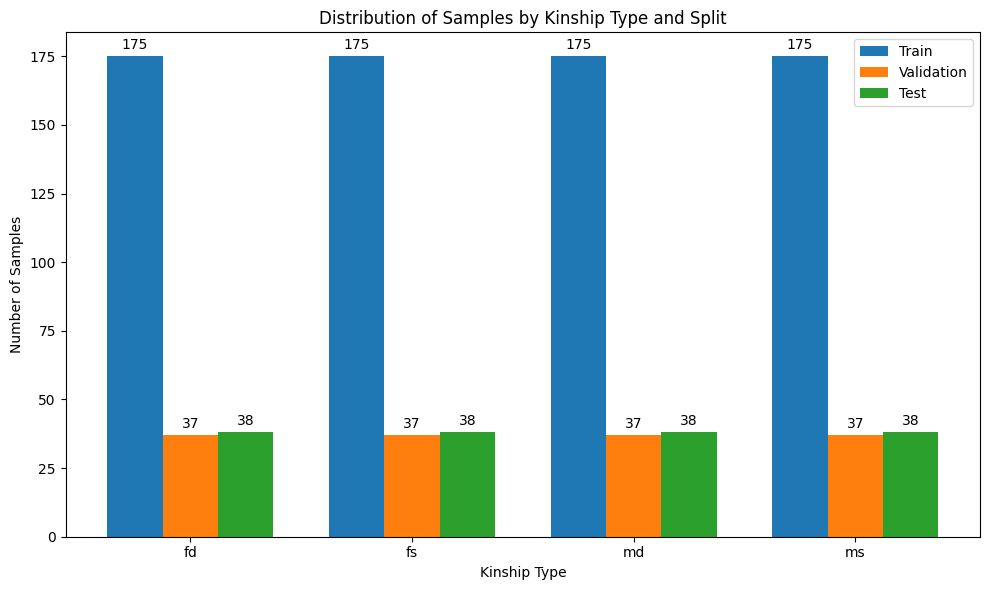

In [ ]:
# After creating your splits
new_train, new_val, new_test = check_dataset_for_leakage(kinship_pairs, dataset, train_dataset, val_dataset, test_dataset)

# If leakage was detected, use the new splits instead
train_loader = DataLoader(new_train, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(new_val, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(new_test, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
import time
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tabulate import tabulate

class KinshipTrainer:
    def __init__(self, model, device, lr=1e-5, weight_decay=1e-4, patience=30):
        self.model = model.to(device)
        self.device = device
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.AdamW(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='min', factor=0.5, patience=30, verbose=True)
        self.patience = patience
        self.history = {}

    def train(self, train_loader, val_loader, num_epochs=30):
        since = time.time()
        best_model_wts = copy.deepcopy(self.model.state_dict())
        best_f1 = 0.0
        no_improve_epochs = 0

        self.history = {k: [] for k in [
            'train_loss', 'train_acc', 'train_prec', 'train_rec', 'train_f1',
            'val_loss', 'val_acc', 'val_prec', 'val_rec', 'val_f1'
        ]}

        for epoch in range(num_epochs):
            print(f"\n🔁 Epoch {epoch+1}/{num_epochs}")
            train_loss, train_acc, train_prec, train_rec, train_f1 = train_epoch(self.model, train_loader, self.criterion, self.optimizer, self.device)
            val_loss, val_acc, val_prec, val_rec, val_f1 = validate(self.model, val_loader, self.criterion, self.device)
            self.scheduler.step(val_loss)

            # Store metrics
            for key, value in zip(self.history.keys(), [train_loss, train_acc, train_prec, train_rec, train_f1, val_loss, val_acc, val_prec, val_rec, val_f1]):
                self.history[key].append(value)

            # Tabular print of metrics
            headers = ["Set", "Loss", "Accuracy", "Precision", "Recall", "F1-Score"]
            train_row = ["Train", f"{train_loss:.4f}", f"{train_acc:.4f}", f"{train_prec:.4f}", f"{train_rec:.4f}", f"{train_f1:.4f}"]
            val_row   = ["Val",   f"{val_loss:.4f}",   f"{val_acc:.4f}",   f"{val_prec:.4f}",   f"{val_rec:.4f}",   f"{val_f1:.4f}"]
            print(tabulate([train_row, val_row], headers=headers, tablefmt="fancy_grid"))

            # Best model tracking
            if val_f1 > best_f1:
                best_f1 = val_f1
                best_model_wts = copy.deepcopy(self.model.state_dict())
                no_improve_epochs = 0
                print(f"✅ Best model updated (F1: {best_f1:.4f})")
            else:
                no_improve_epochs += 1
                print(f"⚠️ No improvement ({no_improve_epochs}/{self.patience})")

            if no_improve_epochs >= self.patience:
                print("⛔ Early stopping triggered")
                break

        self.model.load_state_dict(best_model_wts)
        time_elapsed = time.time() - since
        print(f"\n⏱ Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s (Best Val F1: {best_f1:.4f})")
        return self.model

    def test(self, test_loader):
        print("\n🧪 Evaluating on test set...")
        return validate(self.model, test_loader, self.criterion, self.device)

    def plot_history(self, save_path='training_history.png'):
        h = self.history
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        axs[0, 0].plot(h['train_loss'], label='Train')
        axs[0, 0].plot(h['val_loss'], label='Val')
        axs[0, 0].set_title('Loss'); axs[0, 0].legend(); axs[0, 0].grid()

        axs[0, 1].plot(h['train_acc'], label='Train')
        axs[0, 1].plot(h['val_acc'], label='Val')
        axs[0, 1].set_title('Accuracy'); axs[0, 1].legend(); axs[0, 1].grid()

        axs[1, 0].plot(h['train_prec'], label='Train Prec')
        axs[1, 0].plot(h['val_prec'], label='Val Prec')
        axs[1, 0].plot(h['train_rec'], label='Train Rec')
        axs[1, 0].plot(h['val_rec'], label='Val Rec')
        axs[1, 0].set_title('Precision & Recall'); axs[1, 0].legend(); axs[1, 0].grid()

        axs[1, 1].plot(h['train_f1'], label='Train')
        axs[1, 1].plot(h['val_f1'], label='Val')
        axs[1, 1].set_title('F1 Score'); axs[1, 1].legend(); axs[1, 1].grid()

        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
        print(f"✅ Training plots saved to '{save_path}'")


🔍 Starting comprehensive data leakage analysis...
🔍 Analyzing dataset structure and potential ID overlaps...

📊 Analyzing FD category (250 pairs):

📊 Analyzing FS category (250 pairs):

📊 Analyzing MD category (250 pairs):

📊 Analyzing MS category (250 pairs):

🧩 Total unique IDs in dataset: 250
   - FD: 250 unique IDs
   - FS: 250 unique IDs
   - MD: 250 unique IDs
   - MS: 250 unique IDs

🔍 Checking for ID overlaps between kinship categories:
⚠️ Found 250 IDs shared between FD and FS:
   - ID 033: Files ['fd_033_1.jpg', 'fd_033_2.jpg', 'fs_033_1.jpg', 'fs_033_2.jpg', 'md_033_1.jpg', 'md_033_2.jpg', 'ms_033_1.jpg', 'ms_033_2.jpg']
   - ID 038: Files ['fd_038_1.jpg', 'fd_038_2.jpg', 'fs_038_1.jpg', 'fs_038_2.jpg', 'md_038_1.jpg', 'md_038_2.jpg', 'ms_038_1.jpg', 'ms_038_2.jpg']
   - ID 095: Files ['fd_095_1.jpg', 'fd_095_2.jpg', 'fs_095_1.jpg', 'fs_095_2.jpg', 'md_095_1.jpg', 'md_095_2.jpg', 'ms_095_1.jpg', 'ms_095_2.jpg']
   - ID 186: Files ['fd_186_1.jpg', 'fd_186_2.jpg', 'fs_186_1.jp

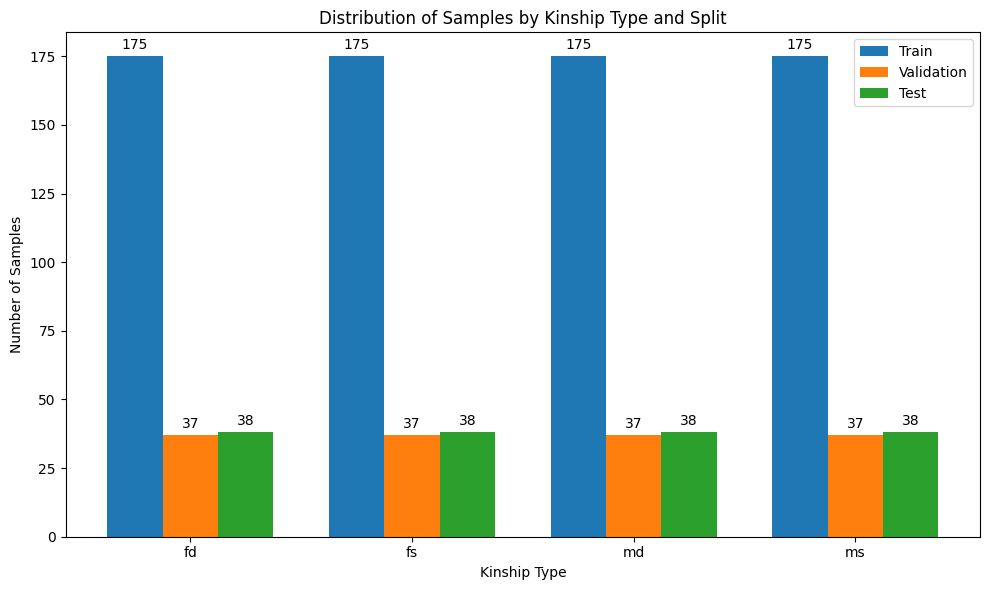

In [ ]:
# After creating your splits
new_train, new_val, new_test = check_dataset_for_leakage(kinship_pairs, dataset, train_dataset, val_dataset, test_dataset)

# If leakage was detected, use the new splits instead
train_loader = DataLoader(new_train, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(new_val, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(new_test, batch_size=batch_size, shuffle=False, num_workers=2)


🔍 Running data leakage check before training...
🔍 Starting comprehensive data leakage analysis...
🔍 Analyzing dataset structure and potential ID overlaps...

📊 Analyzing FD category (250 pairs):

📊 Analyzing FS category (250 pairs):

📊 Analyzing MD category (250 pairs):

📊 Analyzing MS category (250 pairs):

🧩 Total unique IDs in dataset: 250
   - FD: 250 unique IDs
   - FS: 250 unique IDs
   - MD: 250 unique IDs
   - MS: 250 unique IDs

🔍 Checking for ID overlaps between kinship categories:
⚠️ Found 250 IDs shared between FD and FS:
   - ID 033: Files ['fd_033_1.jpg', 'fd_033_2.jpg', 'fs_033_1.jpg', 'fs_033_2.jpg', 'md_033_1.jpg', 'md_033_2.jpg', 'ms_033_1.jpg', 'ms_033_2.jpg']
   - ID 038: Files ['fd_038_1.jpg', 'fd_038_2.jpg', 'fs_038_1.jpg', 'fs_038_2.jpg', 'md_038_1.jpg', 'md_038_2.jpg', 'ms_038_1.jpg', 'ms_038_2.jpg']
   - ID 095: Files ['fd_095_1.jpg', 'fd_095_2.jpg', 'fs_095_1.jpg', 'fs_095_2.jpg', 'md_095_1.jpg', 'md_095_2.jpg', 'ms_095_1.jpg', 'ms_095_2.jpg']
   - ID 186: Fi

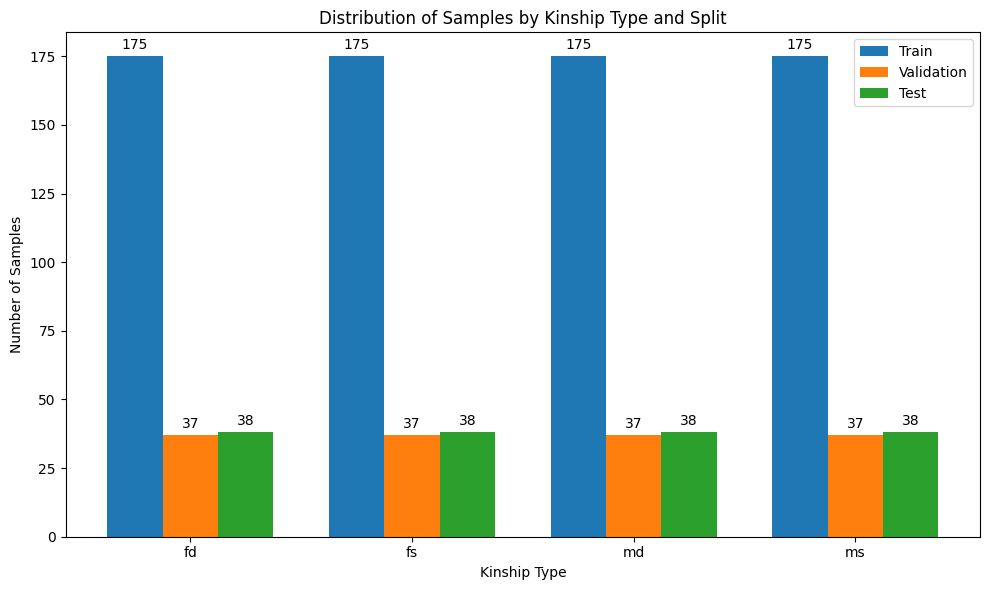

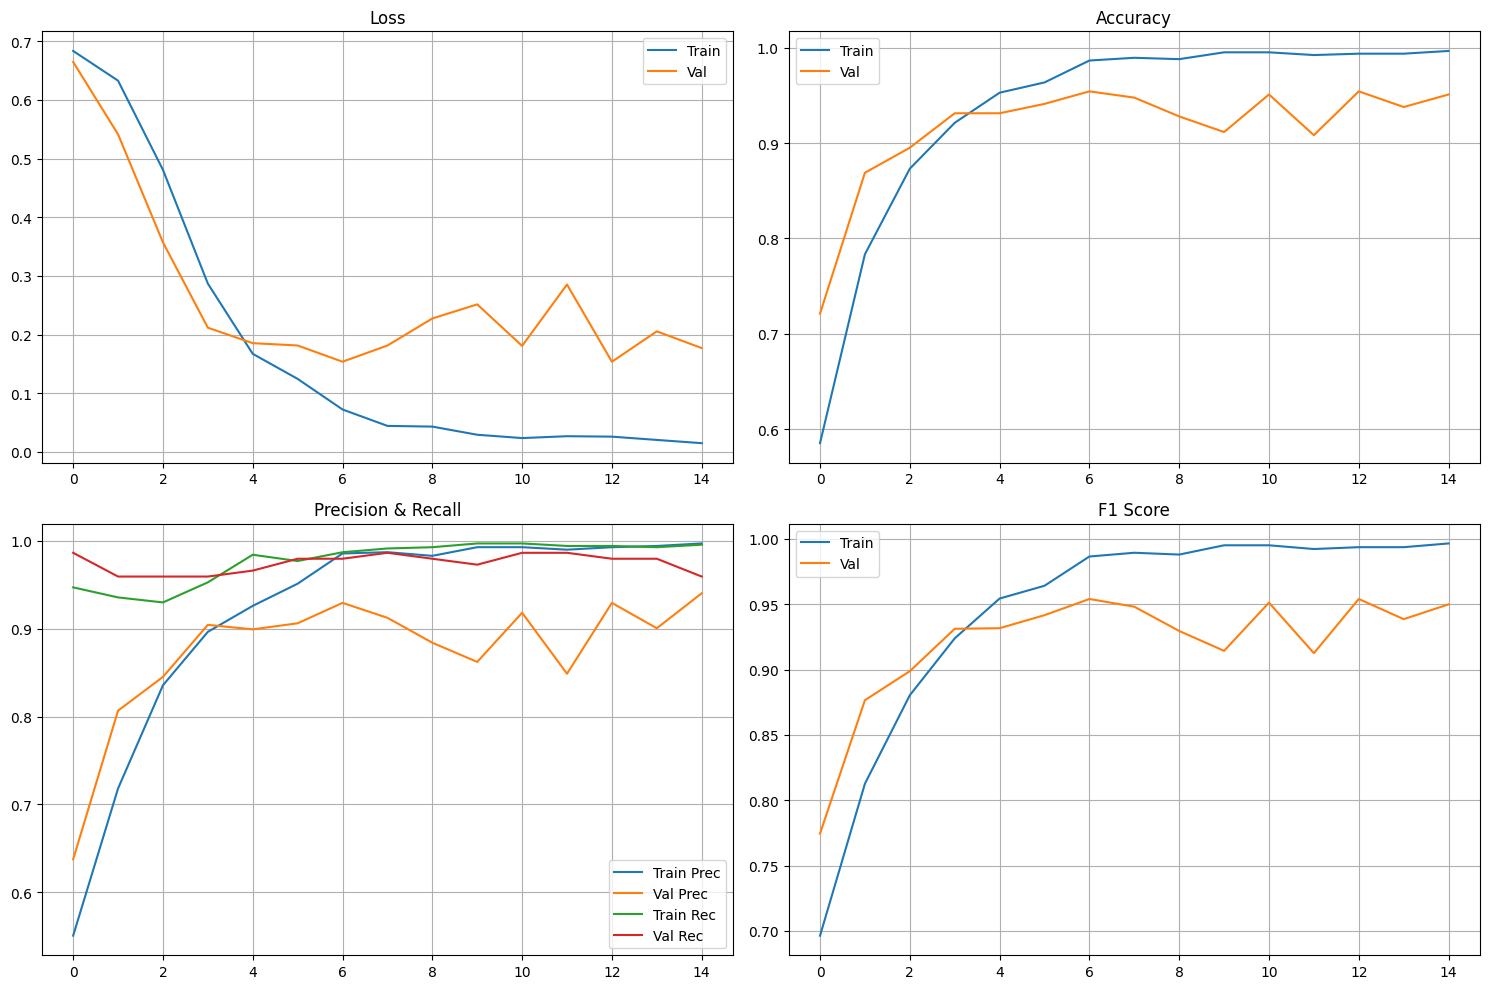

✅ Training plots saved to 'training_history_leakage_free.png'


In [ ]:
# Re-initialize model

# First, check the dataset for leakage and get leakage-free splits
print("\n🔍 Running data leakage check before training...")
new_train_dataset, new_val_dataset, new_test_dataset = check_dataset_for_leakage(
    kinship_pairs, dataset, train_dataset, val_dataset, test_dataset
)

# Create new data loaders with the leakage-free splits
batch_size = 16  # Use the same batch size as before
new_train_loader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
new_val_loader = DataLoader(new_val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
new_test_loader = DataLoader(new_test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("\n📊 New data loaders created:")
print(f"   - Train: {len(new_train_loader.dataset)} samples")
print(f"   - Validation: {len(new_val_loader.dataset)} samples")
print(f"   - Test: {len(new_test_loader.dataset)} samples")
model = SiameseSwinTransformer(pretrained=True, freeze_base=False)

# Initialize trainer
trainer = KinshipTrainer(model=model, device=device)

# Train model
model = trainer.train(new_train_loader, new_val_loader, num_epochs=30)

# Evaluate on test
test_loss, test_acc, test_prec, test_rec, test_f1 = trainer.test(new_test_loader)

print(f"Test F1 Score: {test_f1:.4f}")

# Plot training history
trainer.plot_history('training_history_leakage_free.png')

# Save model
torch.save(model.state_dict(), 'kinship_model_leakage_free.pth')



🧪 Starting comprehensive evaluation on leakage-free test set...

📊 Running comprehensive model evaluation...

📈 Test Set Performance:
Loss: 0.0984
Accuracy: 0.9633

📋 Classification Report:
              precision    recall  f1-score   support

     Not Kin       0.98      0.95      0.96       148
         Kin       0.95      0.98      0.96       152

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


📊 Creating confusion matrix...
✅ Confusion matrix saved to 'confusion_matrix.png'

📉 Creating ROC curve...
✅ ROC curve saved to 'roc_curve.png'
ROC-AUC Score: 0.9948

👨‍👩‍👧‍👦 Analyzing performance by kinship type...
✅ Kinship accuracy plot saved to 'kinship_accuracy.png'
FD: 1.0000
FS: 0.9737
MD: 0.9474
MS: 1.0000

✅ Complete evaluation results saved to 'evaluation_results.txt'
✅ Test probabilities and labels saved for further analysis


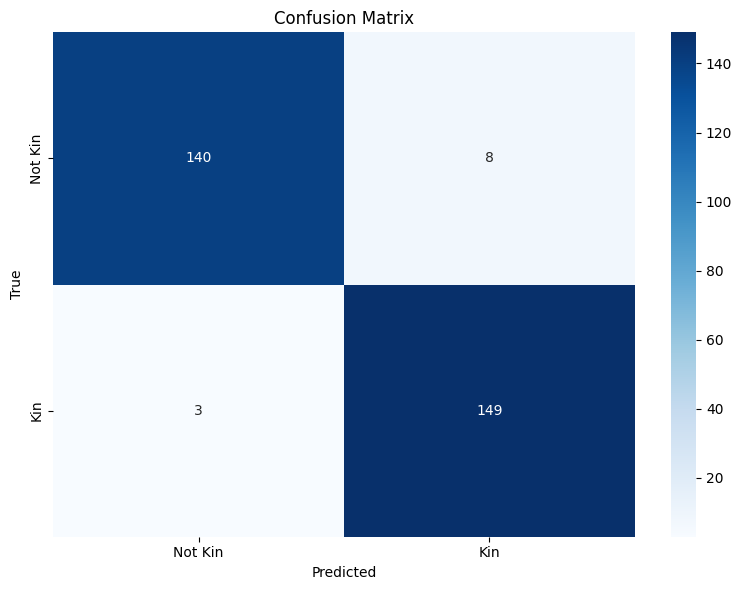

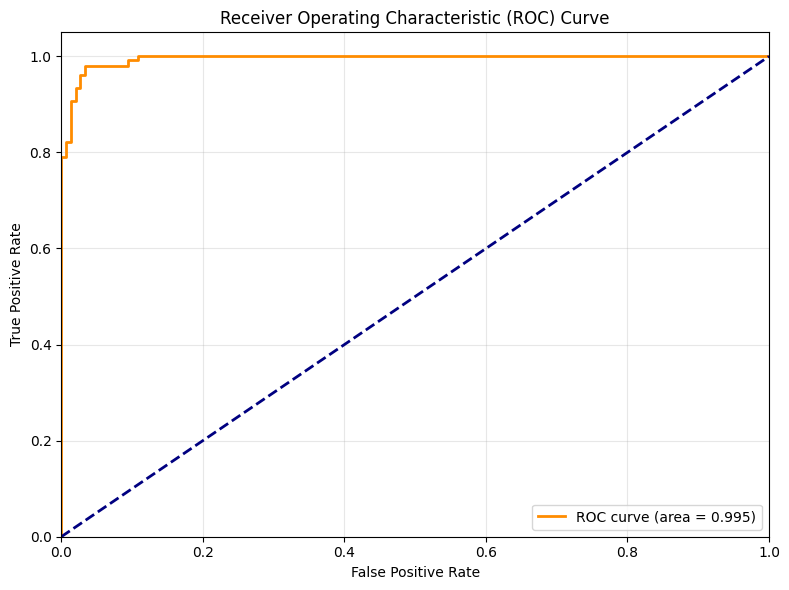

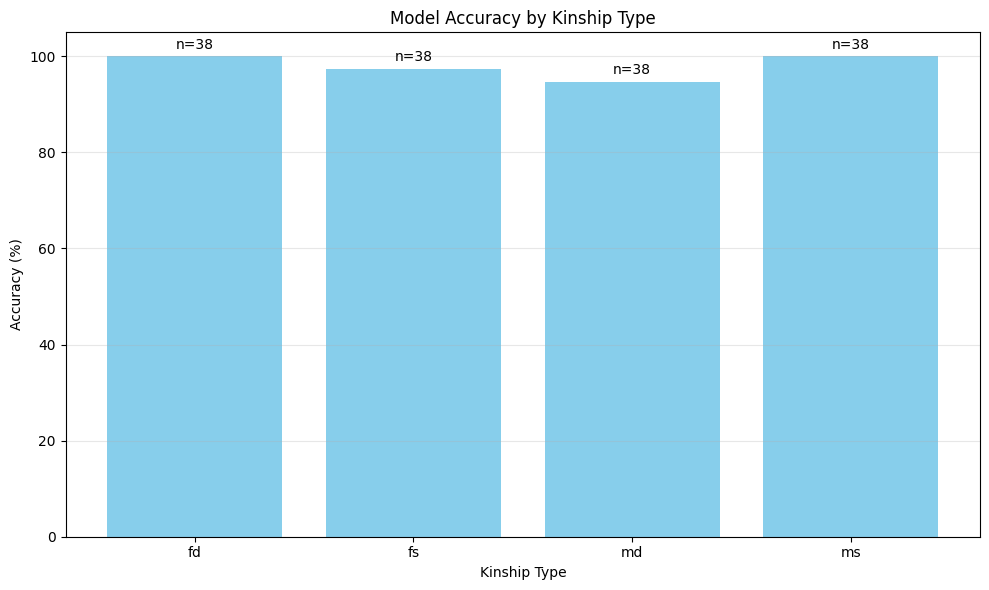

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

def evaluate_model_on_test(model, test_loader, criterion, device):
    """
    Comprehensive evaluation of the model on test set
    Returns detailed metrics and predictions for further analysis
    """
    model.eval()
    all_preds = []
    all_probs = []  # For storing probability scores
    all_labels = []
    running_loss = 0.0

    with torch.no_grad():
        for img1, img2, labels in test_loader:
            img1, img2, labels = img1.to(device), img2.to(device), labels.to(device)

            # Forward pass
            outputs = model(img1, img2)
            loss = criterion(outputs, labels)

            # Get predictions and probabilities
            probs = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            # Track statistics
            running_loss += loss.item() * img1.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs[:, 1].cpu().numpy())  # Probability of positive class
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    test_loss = running_loss / len(test_loader.dataset)
    metrics = {
        'loss': test_loss,
        'accuracy': np.mean(np.array(all_preds) == np.array(all_labels)),
        'predictions': all_preds,
        'true_labels': all_labels,
        'probabilities': all_probs
    }

    return metrics

def visualize_confusion_matrix(y_true, y_pred, class_names=['Not Kin', 'Kin']):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    print("✅ Confusion matrix saved to 'confusion_matrix.png'")
    return plt.gcf()

def plot_roc_curve(y_true, y_scores):
    """Plot ROC curve and calculate AUC"""
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('roc_curve.png')
    print("✅ ROC curve saved to 'roc_curve.png'")
    return plt.gcf(), roc_auc

def analyze_kinship_performance(model, test_loader, dataset, device):
    """Analyze performance by kinship type"""
    model.eval()

    # Track performance by kinship type
    kinship_results = {
        'fd': {'correct': 0, 'total': 0},
        'fs': {'correct': 0, 'total': 0},
        'md': {'correct': 0, 'total': 0},
        'ms': {'correct': 0, 'total': 0}
    }

    with torch.no_grad():
        for idx, (img1, img2, label) in enumerate(test_loader.dataset):
            # Skip negative pairs
            if label == 0:
                continue

            # Process sample
            img1 = img1.unsqueeze(0).to(device)
            img2 = img2.unsqueeze(0).to(device)
            label = torch.tensor([label]).to(device)

            # Get pair info from dataset
            img_path = test_loader.dataset.dataset.pairs[test_loader.dataset.indices[idx]][0]

            # Determine kinship type
            kinship_type = None
            if 'father-dau' in img_path:
                kinship_type = 'fd'
            elif 'father-son' in img_path:
                kinship_type = 'fs'
            elif 'mother-dau' in img_path:
                kinship_type = 'md'
            elif 'mother-son' in img_path:
                kinship_type = 'ms'

            if kinship_type:
                # Get prediction
                outputs = model(img1, img2)
                _, preds = torch.max(outputs, 1)

                # Update counters
                kinship_results[kinship_type]['total'] += 1
                if preds.item() == label.item():
                    kinship_results[kinship_type]['correct'] += 1

    # Calculate accuracy by kinship type
    kinship_accuracy = {}
    for k_type, results in kinship_results.items():
        if results['total'] > 0:
            kinship_accuracy[k_type] = results['correct'] / results['total']
        else:
            kinship_accuracy[k_type] = 0

    # Plot results
    plt.figure(figsize=(10, 6))
    types = list(kinship_accuracy.keys())
    accuracies = [kinship_accuracy[k] * 100 for k in types]
    counts = [kinship_results[k]['total'] for k in types]

    bars = plt.bar(types, accuracies, color='skyblue')

    # Add count labels
    for i, (bar, count) in enumerate(zip(bars, counts)):
        plt.text(i, bar.get_height() + 1, f'n={count}',
                ha='center', va='bottom', fontsize=10)

    plt.xlabel('Kinship Type')
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracy by Kinship Type')
    plt.ylim(0, 105)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('kinship_accuracy.png')
    print("✅ Kinship accuracy plot saved to 'kinship_accuracy.png'")

    return kinship_accuracy, plt.gcf()

# Main evaluation function
def run_comprehensive_evaluation(model, test_loader, criterion, device):
    print("\n📊 Running comprehensive model evaluation...")

    # Basic evaluation
    metrics = evaluate_model_on_test(model, test_loader, criterion, device)

    # Print summary metrics
    print("\n📈 Test Set Performance:")
    print(f"Loss: {metrics['loss']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")

    # Print detailed classification report
    print("\n📋 Classification Report:")
    report = classification_report(metrics['true_labels'], metrics['predictions'],
                                 target_names=['Not Kin', 'Kin'])
    print(report)

    # Create confusion matrix
    print("\n📊 Creating confusion matrix...")
    cm_fig = visualize_confusion_matrix(metrics['true_labels'], metrics['predictions'])

    # Create ROC curve
    print("\n📉 Creating ROC curve...")
    roc_fig, roc_auc = plot_roc_curve(metrics['true_labels'], metrics['probabilities'])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Analyze performance by kinship type
    print("\n👨‍👩‍👧‍👦 Analyzing performance by kinship type...")
    kinship_acc, kinship_fig = analyze_kinship_performance(model, test_loader, test_loader.dataset, device)

    for k_type, acc in kinship_acc.items():
        print(f"{k_type.upper()}: {acc:.4f}")

    # Option: Save results to file
    with open('evaluation_results.txt', 'w') as f:
        f.write(f"Test Loss: {metrics['loss']:.4f}\n")
        f.write(f"Test Accuracy: {metrics['accuracy']:.4f}\n")
        f.write(f"ROC-AUC Score: {roc_auc:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(report)
        f.write("\nAccuracy by Kinship Type:\n")
        for k_type, acc in kinship_acc.items():
            f.write(f"{k_type.upper()}: {acc:.4f}\n")

    print("\n✅ Complete evaluation results saved to 'evaluation_results.txt'")
    return metrics, kinship_acc

# Run the evaluation
print("\n🧪 Starting comprehensive evaluation on leakage-free test set...")
eval_metrics, kinship_accuracy = run_comprehensive_evaluation(model, new_test_loader, criterion, device)

# Optional: Save the probabilities for potential threshold tuning
np.save('test_probabilities.npy', np.array(eval_metrics['probabilities']))
np.save('test_true_labels.npy', np.array(eval_metrics['true_labels']))
print("✅ Test probabilities and labels saved for further analysis")


🔍 Testing trained model on KinFaceW-I dataset...
✅ Created dataset with 1066 pairs: 533 positive, 533 negative
✅ KinFaceW-I test dataset created with 1066 samples

🔬 Evaluating model on KinFaceW-I dataset...

📊 KinFaceW-I Results:
Accuracy: 0.7814
Precision: 0.8333
Recall: 0.7036
F1 Score: 0.7630

📊 Creating KinFaceW-I confusion matrix...
✅ Confusion matrix saved to 'confusion_matrix.png'

📉 Creating KinFaceW-I ROC curve...
ROC-AUC Score: 0.8581

👨‍👩‍👧‍👦 Analyzing KinFaceW-I performance by kinship type...
FD: 0.6194
FS: 0.6603
MD: 0.8661
MS: 0.6810

🔄 Comparing KinFaceW-I and KinFaceW-II results...

📋 Comparison Results:
Dataset      Accuracy   Precision  Recall     F1 Score   ROC-AUC   
KinFaceW-II  0.9633     0.9490     0.9803     0.9644     0.8581    
KinFaceW-I   0.7814     0.8333     0.7036     0.7630     0.8581    
✅ Comparison chart saved to 'kinship_comparison.png'

✅ Cross-dataset evaluation complete


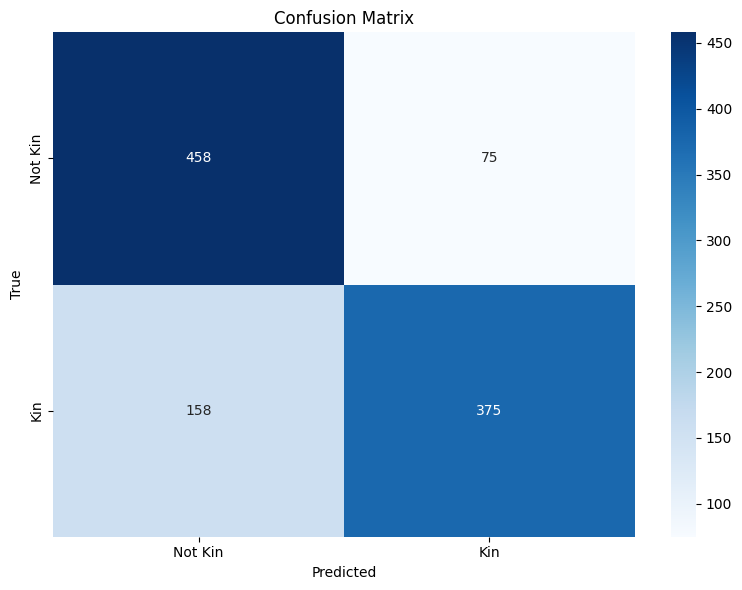

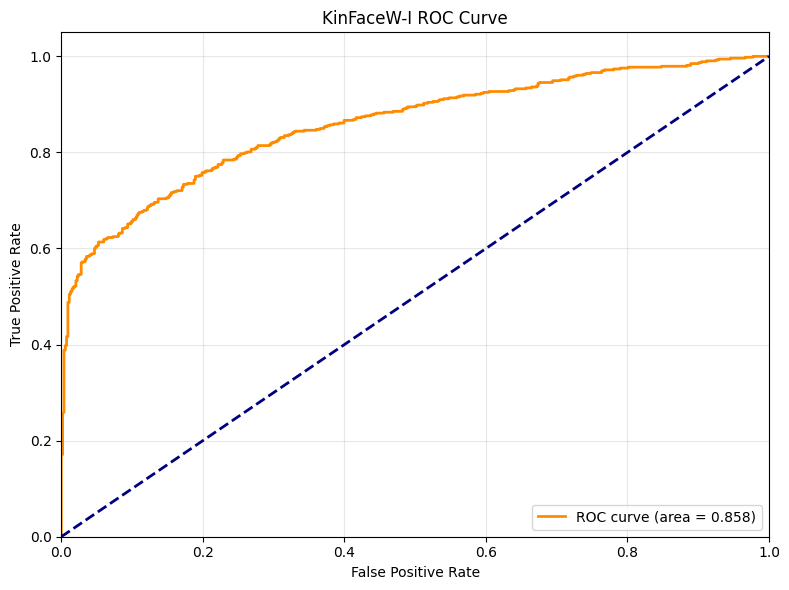

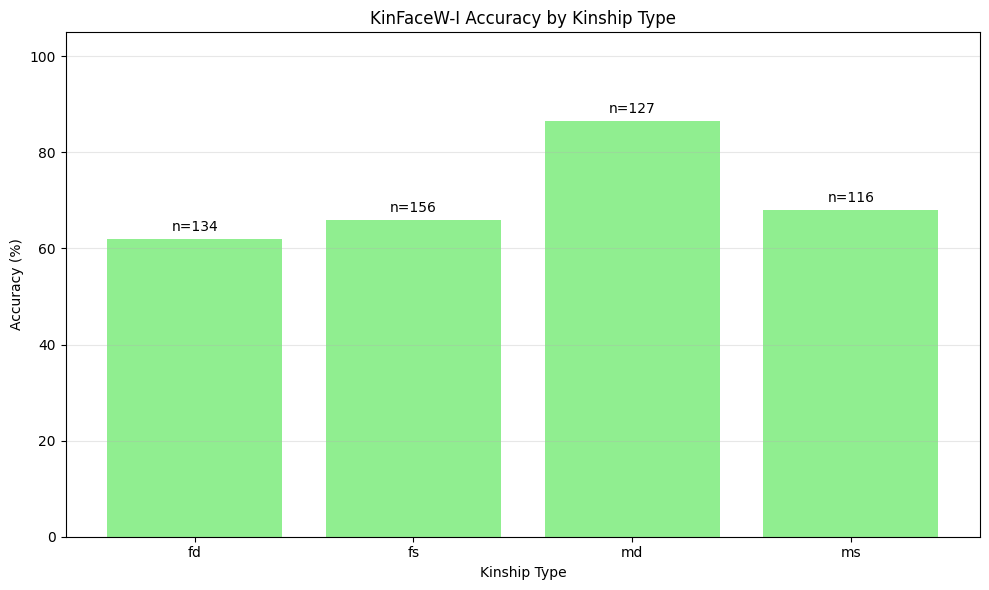

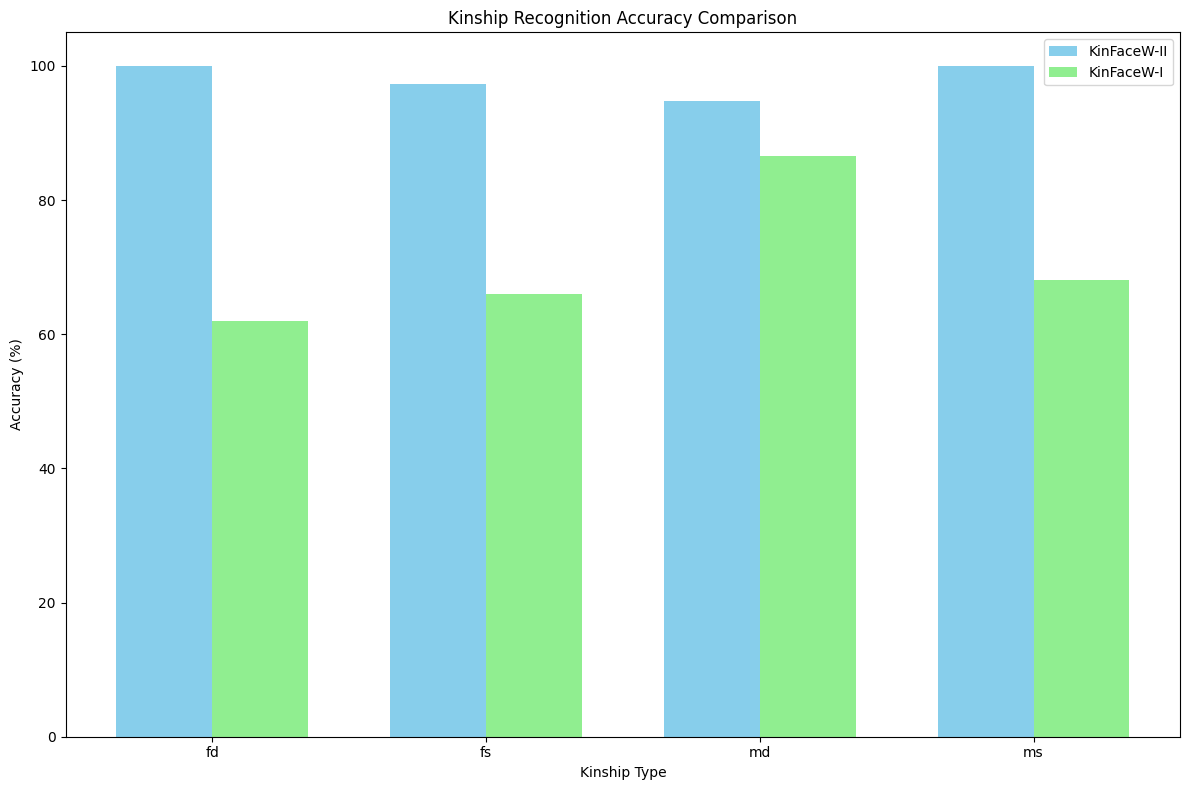